In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [72]:
df=pd.read_excel('Real State Data.xlsx')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   PriceTotal           42 non-null     object
 1   Meterage             42 non-null     object
 2   Year                 42 non-null     object
 3   Room No              42 non-null     object
 4   Floor No             42 non-null     object
 5   Building Floors      42 non-null     object
 6   Units Per Floor      42 non-null     object
 7   Parking Lot          42 non-null     object
 8   Elevator             42 non-null     object
 9   Warehouse            42 non-null     object
 10  Balcony              42 non-null     object
 11  Add Parking          42 non-null     object
 12  Joint Parking        42 non-null     object
 13  Living Room Window   42 non-null     object
 14  Renovation Status    42 non-null     object
 15  Floor Covering       42 non-null     object
 16  Cabinet   

In [74]:
df.head()

,PriceTotal,Meterage,Year,Room No,Floor No,Building Floors,Units Per Floor,Parking Lot,Elevator,Warehouse,...,Cooling,Water Heating,Hood,Desktop Stove,Closet,Building Direction,Apartment Direction,Joint Status,Address,Address in Farsi
0,In Milliard Tooman,in mm,Construction Year,Just bedrooms are counted,Apartment floor,Number of floors in the building,Number of apartments in the floor of this apar...,Number of certified Parkings,"0: Not Available, 1: Available","0: Not Available, 1: Available",...,"0: Water cooler, 1: Split/Duct, 2: Others","0: Water Heater, 1: Radiator Package, 2: Central","0: Not Available, 1: Hidden , 2: Old 3: Modern","0: Not Available, 1: Available",Number of closets in rooms,If yard is in the front and is visible at the ...,View if apartment,"Joint Property Status according to be cleaned,...",Region,NaN
1,7.55,90,1397,2,2,5,2,1,1,1,...,NAN,NAN,NAN,NAN,2,South,South,NAN,Behnood,بهنود.کوچه شیربانی
2,2.25,37,1383,1,1,4,1,0,0,1,...,1,NAN,3,1,NAN,NAN,NAN,NAN,Ghasredasht_Behnood,قصرالدشت بهنود
3,3.95,59,1388,2,1,4,1,0,0,1,...,0,1,3,1,1,NAN,NAN,NAN,Ghasredasht_Behnood,قصرالدشت پایینتر از آذربایجان
4,3.35,63,1382,2,2,4,2,0,0,1,...,0,0,NAN,NAN,NAN,North,NAN,NAN,Mashouf_Behnood,بالای بهنود


In [75]:
df.replace('NAN',np.nan,inplace=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   PriceTotal           42 non-null     object
 1   Meterage             42 non-null     object
 2   Year                 42 non-null     object
 3   Room No              42 non-null     object
 4   Floor No             42 non-null     object
 5   Building Floors      36 non-null     object
 6   Units Per Floor      40 non-null     object
 7   Parking Lot          42 non-null     object
 8   Elevator             42 non-null     object
 9   Warehouse            42 non-null     object
 10  Balcony              35 non-null     object
 11  Add Parking          42 non-null     object
 12  Joint Parking        42 non-null     object
 13  Living Room Window   27 non-null     object
 14  Renovation Status    31 non-null     object
 15  Floor Covering       35 non-null     object
 16  Cabinet   

In [77]:
# The first row gives some information about the contents of each column, so droped.
# Also Address in Farsi in not needed, so dropeed.
df.drop(0,axis=0,inplace=True)
df.drop('Address in Farsi',axis=1,inplace=True)

In [78]:
df.head()

,PriceTotal,Meterage,Year,Room No,Floor No,Building Floors,Units Per Floor,Parking Lot,Elevator,Warehouse,...,Heating,Cooling,Water Heating,Hood,Desktop Stove,Closet,Building Direction,Apartment Direction,Joint Status,Address
1,7.55,90,1397,2,2,5,2,1,1,1,...,NaN,NaN,NaN,NaN,NaN,2,South,South,NaN,Behnood
2,2.25,37,1383,1,1,4,1,0,0,1,...,1,1,NaN,3,1,NaN,NaN,NaN,NaN,Ghasredasht_Behnood
3,3.95,59,1388,2,1,4,1,0,0,1,...,1,0,1,3,1,1,NaN,NaN,NaN,Ghasredasht_Behnood
4,3.35,63,1382,2,2,4,2,0,0,1,...,0,0,0,NaN,NaN,NaN,North,NaN,NaN,Mashouf_Behnood
5,2.85,70,1375,1,2,3,2,0,0,1,...,0,0,0,NaN,NaN,NaN,South,NaN,NaN,Karoon_Behnood


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 1 to 41
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   PriceTotal           41 non-null     object
 1   Meterage             41 non-null     object
 2   Year                 41 non-null     object
 3   Room No              41 non-null     object
 4   Floor No             41 non-null     object
 5   Building Floors      35 non-null     object
 6   Units Per Floor      39 non-null     object
 7   Parking Lot          41 non-null     object
 8   Elevator             41 non-null     object
 9   Warehouse            41 non-null     object
 10  Balcony              34 non-null     object
 11  Add Parking          41 non-null     object
 12  Joint Parking        41 non-null     object
 13  Living Room Window   26 non-null     object
 14  Renovation Status    30 non-null     object
 15  Floor Covering       34 non-null     object
 16  Cabinet   

In [80]:
# to correct the RangeIndex
df.reset_index(drop=True, inplace=True)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   PriceTotal           41 non-null     object
 1   Meterage             41 non-null     object
 2   Year                 41 non-null     object
 3   Room No              41 non-null     object
 4   Floor No             41 non-null     object
 5   Building Floors      35 non-null     object
 6   Units Per Floor      39 non-null     object
 7   Parking Lot          41 non-null     object
 8   Elevator             41 non-null     object
 9   Warehouse            41 non-null     object
 10  Balcony              34 non-null     object
 11  Add Parking          41 non-null     object
 12  Joint Parking        41 non-null     object
 13  Living Room Window   26 non-null     object
 14  Renovation Status    30 non-null     object
 15  Floor Covering       34 non-null     object
 16  Cabinet   

In [82]:
df.isnull().sum()

PriceTotal              0
Meterage                0
Year                    0
Room No                 0
Floor No                0
Building Floors         6
Units Per Floor         2
Parking Lot             0
Elevator                0
Warehouse               0
Balcony                 7
Add Parking             0
Joint Parking           0
Living Room Window     15
Renovation Status      11
Floor Covering          7
Cabinet                16
Bathroom               10
Heating                 9
Cooling                 9
Water Heating          13
Hood                   20
Desktop Stove          21
Closet                 24
Building Direction     22
Apartment Direction    40
Joint Status           31
Address                 0
dtype: int64

In [83]:
# The sample numbers are too low. So many of them should be droped in order to reach an accurate solution. I decided to drop all the columns with null values. 
for i in df.columns:
    if df[i].isnull().sum()>0:
        df.drop(i,axis=1,inplace=True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PriceTotal     41 non-null     object
 1   Meterage       41 non-null     object
 2   Year           41 non-null     object
 3   Room No        41 non-null     object
 4   Floor No       41 non-null     object
 5   Parking Lot    41 non-null     object
 6   Elevator       41 non-null     object
 7   Warehouse      41 non-null     object
 8   Add Parking    41 non-null     object
 9   Joint Parking  41 non-null     object
 10  Address        41 non-null     object
dtypes: object(11)
memory usage: 3.7+ KB


In [85]:
df['Add Parking'].value_counts()

Add Parking
0    37
1     4
Name: count, dtype: int64

<Axes: xlabel='Add Parking', ylabel='PriceTotal'>

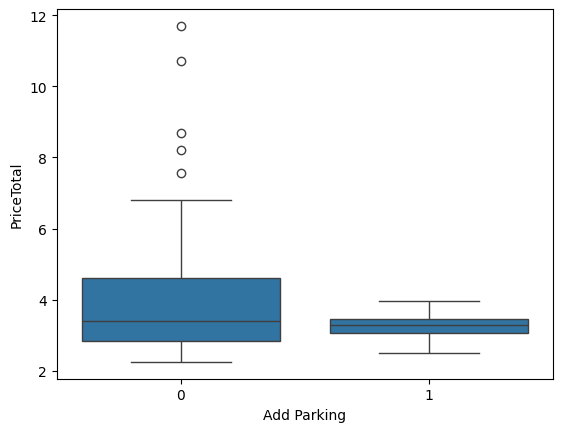

In [86]:
sns.boxplot(y='PriceTotal',x='Add Parking',data=df,width=0.8)

In [87]:
df['Joint Parking'].value_counts()

Joint Parking
0    37
1     4
Name: count, dtype: int64

<Axes: xlabel='Joint Parking', ylabel='PriceTotal'>

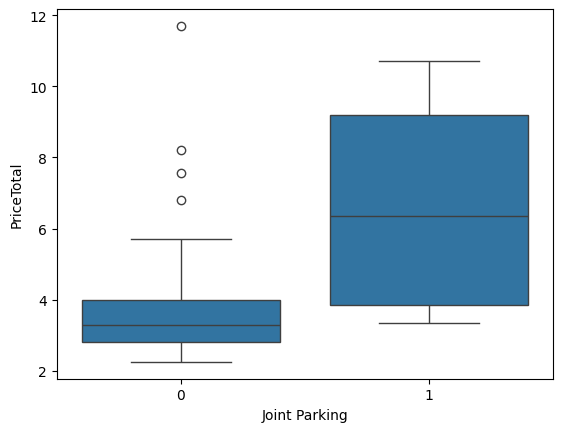

In [88]:
sns.boxplot(y='PriceTotal',x='Joint Parking',data=df,width=0.8)

In [89]:
# 'Add Parking' doesn't seem to have a considerable effect on total price, so droped.
df.drop('Add Parking',axis=1,inplace=True)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PriceTotal     41 non-null     object
 1   Meterage       41 non-null     object
 2   Year           41 non-null     object
 3   Room No        41 non-null     object
 4   Floor No       41 non-null     object
 5   Parking Lot    41 non-null     object
 6   Elevator       41 non-null     object
 7   Warehouse      41 non-null     object
 8   Joint Parking  41 non-null     object
 9   Address        41 non-null     object
dtypes: object(10)
memory usage: 3.3+ KB


In [91]:
df.head()

,PriceTotal,Meterage,Year,Room No,Floor No,Parking Lot,Elevator,Warehouse,Joint Parking,Address
0,7.55,90,1397,2,2,1,1,1,0,Behnood
1,2.25,37,1383,1,1,0,0,1,0,Ghasredasht_Behnood
2,3.95,59,1388,2,1,0,0,1,0,Ghasredasht_Behnood
3,3.35,63,1382,2,2,0,0,1,1,Mashouf_Behnood
4,2.85,70,1375,1,2,0,0,1,0,Karoon_Behnood


<Axes: xlabel='PriceTotal', ylabel='Address'>

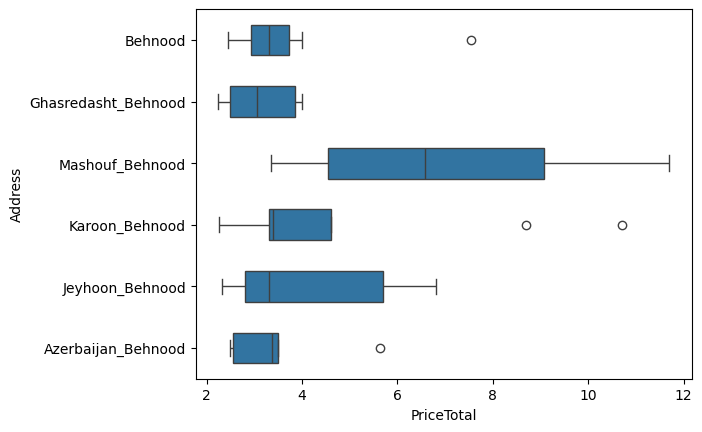

In [92]:
sns.boxplot(y='Address',x='PriceTotal',data=df,width=0.5)

In [93]:
df['PriceTotal'].unique()

array([7.55, 2.25, 3.95, 3.35, 2.85, 5.7, 3.38, 3.5, 10.7, 3.4, 8.7, 4.95,
       2.32, 2.6, 2.5, 11.7, 8.2, 3.26, 6.8, 3.3, 4, 4.6, 3.45, 5.63, 3,
       3.99, 2.4, 2.8, 2.45, 3.85, 2.86, 3.05, 2.53, 2.27], dtype=object)

In [94]:
df['PriceTotal']=df['PriceTotal'].astype(float)

In [95]:
df['Meterage'].unique()

array([90, 37, 59, 63, 70, 100, 49, 145, 125, 69, 44, 147.5, 98, 45, 85,
       62, 60, 79, 56, 72, 50, 36, 40, 53, 39, 58], dtype=object)

In [96]:
df['Meterage']=df['Meterage'].astype(float)

In [97]:
df['Year']=df['Year'].astype(int)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PriceTotal     41 non-null     float64
 1   Meterage       41 non-null     float64
 2   Year           41 non-null     int32  
 3   Room No        41 non-null     object 
 4   Floor No       41 non-null     object 
 5   Parking Lot    41 non-null     object 
 6   Elevator       41 non-null     object 
 7   Warehouse      41 non-null     object 
 8   Joint Parking  41 non-null     object 
 9   Address        41 non-null     object 
dtypes: float64(2), int32(1), object(7)
memory usage: 3.2+ KB


In [99]:
df['Room No'].unique()

array([2, 1, 4, 3], dtype=object)

In [100]:
df['Floor No'].unique()

array([2, 1, 3, 5, 4], dtype=object)

In [101]:
df['Parking Lot'].unique()

array([1, 0], dtype=object)

In [102]:
df['Elevator'].unique()

array([1, 0], dtype=object)

In [103]:
df['Warehouse'].unique()

array([1, 0], dtype=object)

<Axes: xlabel='Floor No', ylabel='count'>

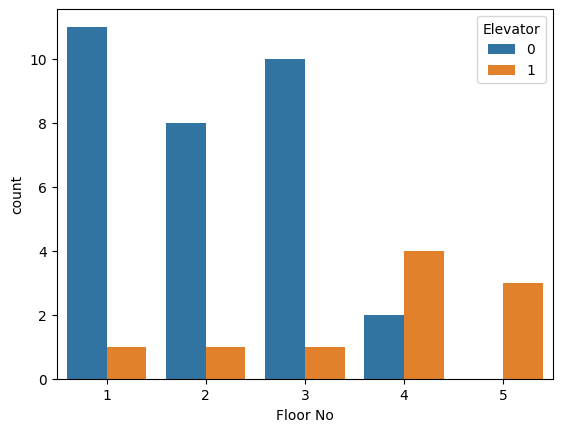

In [104]:
sns.countplot(hue='Elevator',x='Floor No',data=df)

<Axes: xlabel='Elevator', ylabel='PriceTotal'>

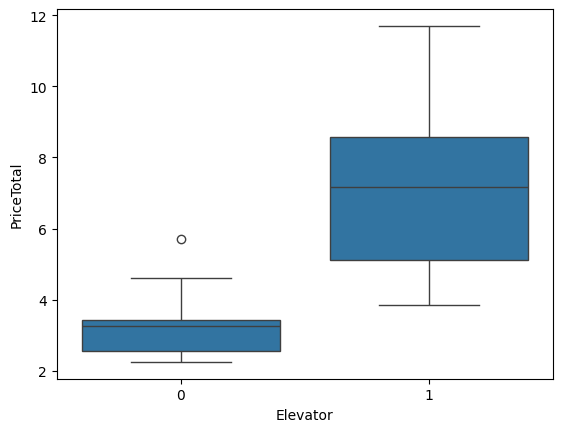

In [105]:
sns.boxplot(x='Elevator',y='PriceTotal',data=df)

<Axes: xlabel='Floor No', ylabel='PriceTotal'>

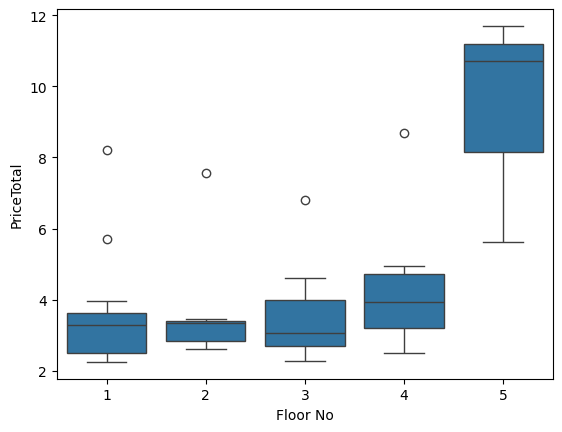

In [106]:
sns.boxplot(x='Floor No',y='PriceTotal',data=df)

<Axes: xlabel='Room No', ylabel='Meterage'>

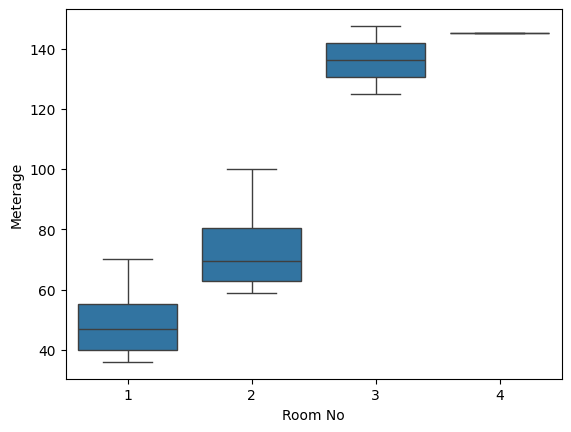

In [107]:
sns.boxplot(x='Room No',y='Meterage',data=df)

In [108]:
# To minimise the number of dummy objects,'Floor Status' is defined to summarize the information about floors numbers.
j=0
for i in df['Elevator']:
    if df.loc[j,'Floor No']>3:
        df.loc[j,'Floor Status']=1
    else:
        df.loc[j,'Floor Status']=0
    j=j+1

In [109]:
df.tail()

,PriceTotal,Meterage,Year,Room No,Floor No,Parking Lot,Elevator,Warehouse,Joint Parking,Address,Floor Status
36,3.05,50.0,1382,1,3,1,0,1,0,Ghasredasht_Behnood,0.0
37,2.50,40.0,1380,1,4,0,0,1,0,Ghasredasht_Behnood,1.0
38,2.53,39.0,1382,1,3,0,0,1,0,Azerbaijan_Behnood,0.0
39,3.00,58.0,1382,1,4,0,0,1,0,Ghasredasht_Behnood,1.0
40,2.27,36.0,1380,1,3,0,0,1,0,Karoon_Behnood,0.0


In [110]:
# 'Floor Status' is defined to substitute 'Floor No'. 
# In addition, It seems that 'Room No' is highly correlated with 'Meterage'. 
# So 'Room No' and'Floor No' are droped.
df.drop(['Room No','Floor No'],axis=1,inplace=True)
df_object = df.drop(df[['PriceTotal','Meterage','Year']],axis=1)

In [111]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Parking Lot    41 non-null     object 
 1   Elevator       41 non-null     object 
 2   Warehouse      41 non-null     object 
 3   Joint Parking  41 non-null     object 
 4   Address        41 non-null     object 
 5   Floor Status   41 non-null     float64
dtypes: float64(1), object(5)
memory usage: 2.1+ KB


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PriceTotal     41 non-null     float64
 1   Meterage       41 non-null     float64
 2   Year           41 non-null     int32  
 3   Parking Lot    41 non-null     object 
 4   Elevator       41 non-null     object 
 5   Warehouse      41 non-null     object 
 6   Joint Parking  41 non-null     object 
 7   Address        41 non-null     object 
 8   Floor Status   41 non-null     float64
dtypes: float64(3), int32(1), object(5)
memory usage: 2.9+ KB


In [113]:
# Make dummies from object predictors.
df_dummy=pd.get_dummies(df_object,drop_first=True)

In [114]:
df_dummy = df_dummy.astype(int)
df_dummy.shape

(41, 10)

In [115]:
# Make output as y and and inputs as X
df.drop(df_object,axis=1,inplace=True)
y = df['PriceTotal']
X = df.drop('PriceTotal',axis=1)

In [116]:
# There are now two columns 'Meterage' and 'Year' in X.
# Normalize X (min=0, max=1)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)

In [117]:
X=pd.concat([X,df_dummy],axis=1)
X.shape

(41, 12)

In [118]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Meterage                     41 non-null     float64
 1   Year                         41 non-null     float64
 2   Floor Status                 41 non-null     int32  
 3   Parking Lot_1                41 non-null     int32  
 4   Elevator_1                   41 non-null     int32  
 5   Warehouse_1                  41 non-null     int32  
 6   Joint Parking_1              41 non-null     int32  
 7   Address_Behnood              41 non-null     int32  
 8   Address_Ghasredasht_Behnood  41 non-null     int32  
 9   Address_Jeyhoon_Behnood      41 non-null     int32  
 10  Address_Karoon_Behnood       41 non-null     int32  
 11  Address_Mashouf_Behnood      41 non-null     int32  
dtypes: float64(2), int32(10)
memory usage: 2.4 KB


In [119]:
X.head()

,Meterage,Year,Floor Status,Parking Lot_1,Elevator_1,Warehouse_1,Joint Parking_1,Address_Behnood,Address_Ghasredasht_Behnood,Address_Jeyhoon_Behnood,Address_Karoon_Behnood,Address_Mashouf_Behnood
0,0.484305,0.838710,0,1,1,1,0,1,0,0,0,0
1,0.008969,0.387097,0,0,0,1,0,0,1,0,0,0
2,0.206278,0.548387,0,0,0,1,0,0,1,0,0,0
3,0.242152,0.354839,0,0,0,1,1,0,0,0,0,1
4,0.304933,0.129032,0,0,0,1,0,0,0,0,1,0


In [120]:
y.head()

0    7.55
1    2.25
2    3.95
3    3.35
4    2.85
Name: PriceTotal, dtype: float64

In [121]:
# Split tran and test datasets.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [122]:
# Use Linear Regression to train data
lm=LinearRegression()
result=lm.fit(X_train,y_train)

In [123]:
# Predict total price by the trained model and input test dataset.
y_hat = lm.predict(X_test)

In [124]:
# Accuracy score of the model for train dataset.
lm.score(X_train,y_train)

0.9739673793700925

In [125]:
# Accuracy score of the model for test dataset.
lm.score(X_test,y_test)

0.9315573676523302

In [126]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
coefs = lm.coef_
intercept = lm.intercept_ 
print("Coefficients: \n", coefs)
print("intercept: \n", intercept)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_hat))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_hat))

Coefficients: 
 [ 6.97705775  3.3515428  -0.20072984  0.36490353  0.03882517 -0.56410156
  0.09611207  0.12657573 -0.19486718 -0.67519391 -0.21465025 -0.01720056]
intercept: 
 1.3693317918551267
Mean squared error: 0.28
Coefficient of determination: 0.93


In [127]:
coefs.shape

(12,)

In [128]:
X.columns

Index(['Meterage', 'Year', 'Floor Status', 'Parking Lot_1', 'Elevator_1',
       'Warehouse_1', 'Joint Parking_1', 'Address_Behnood',
       'Address_Ghasredasht_Behnood', 'Address_Jeyhoon_Behnood',
       'Address_Karoon_Behnood', 'Address_Mashouf_Behnood'],
      dtype='object')

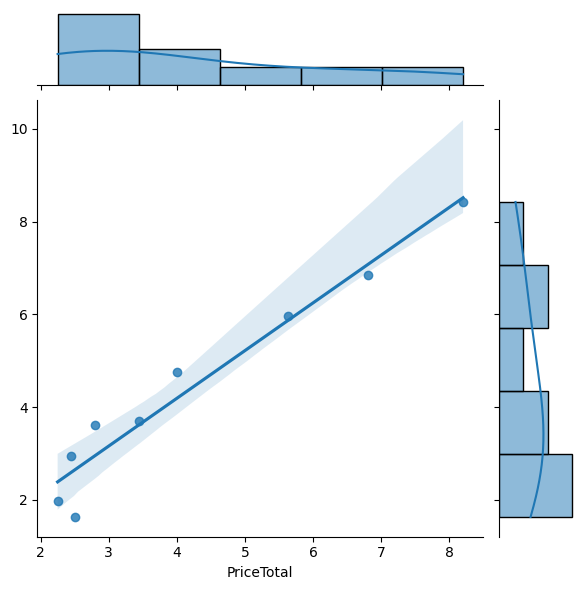

In [129]:
# Plot outputs
sns.jointplot(y=y_hat, x=y_test, kind='reg')


In [130]:
from scipy import stats

In [131]:
# Claculating t-stat and p-value for predictors.
j=0
k=0
t_stat_all=[]
p_value_all=[]

# When p-value is more than 0.0001, maybe the relationship between price and the predictor is weaker.
for i in X.columns:
    t_stat, p_value = stats.ttest_ind(X_test[i], y_hat)
    t_stat_all.append(t_stat)
    p_value_all.append(p_value)
    if p_value_all[j] >0.0001:
        k=k+1
        print(i,'-----t=',t_stat,'-----p=',p_value)
    j=j+1

Year -----t= -4.948377820063441 -----p= 0.00014524960861465994
Parking Lot_1 -----t= -5.1110778143983095 -----p= 0.00010467533063676632
Elevator_1 -----t= -5.1110778143983095 -----p= 0.00010467533063676632
Warehouse_1 -----t= -4.51443409537627 -----p= 0.00035285332201998406


C:\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [132]:
#Enter a sample to predict the price using the trained model. 
Example1 = pd.read_excel('Our House Prediction.xlsx')

In [133]:
Example1

,PriceTotal,Meterage,Year,Room No,Floor No,Building Floors,Units Per Floor,Parking Lot,Elevator,Warehouse,...,Cooling,Water Heating,Hood,Desktop Stove,Closet,Building Direction,Apartment Direction,Joint Status,Address,Address in Farsi
0,NaN,43.1,1381,1,4,4,2,0,0,1,...,0,1,3,1,1,North,North,1,Mashouf_Behnood,خیابان مشعوف آزادی


In [134]:
df.columns

Index(['PriceTotal', 'Meterage', 'Year'], dtype='object')

In [135]:
Example1['Floor Status']=1
Example1_notneeded = Example1.drop(df.columns,axis=1)
Example1_notneeded = Example1_notneeded.drop(df_object.columns,axis=1)

In [136]:
Example1.drop(Example1_notneeded,axis=1,inplace=True)

In [137]:
Example1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PriceTotal     0 non-null      float64
 1   Meterage       1 non-null      float64
 2   Year           1 non-null      int64  
 3   Parking Lot    1 non-null      int64  
 4   Elevator       1 non-null      int64  
 5   Warehouse      1 non-null      int64  
 6   Joint Parking  1 non-null      int64  
 7   Address        1 non-null      object 
 8   Floor Status   1 non-null      int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 204.0+ bytes


In [138]:
Example1.head()

,PriceTotal,Meterage,Year,Parking Lot,Elevator,Warehouse,Joint Parking,Address,Floor Status
0,NaN,43.1,1381,0,0,1,0,Mashouf_Behnood,1


In [139]:
MinMeterage = df['Meterage'].min()
MaxMeterage = df['Meterage'].max()

MinYear = df['Year'].min()
MaxYear = df['Year'].max()

In [140]:
Example1['Year']

0    1381
Name: Year, dtype: int64

In [141]:
Example1['Meterage']=(Example1['Meterage']-MinMeterage)/(MaxMeterage-MinMeterage)
Example1['Year']=(Example1['Year']-MinYear)/(MaxYear-MinYear)

In [142]:
Example1['Meterage']

0    0.063677
Name: Meterage, dtype: float64

In [143]:
Example1['Year']

0    0.322581
Name: Year, dtype: float64

In [144]:
Example1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PriceTotal     0 non-null      float64
 1   Meterage       1 non-null      float64
 2   Year           1 non-null      float64
 3   Parking Lot    1 non-null      int64  
 4   Elevator       1 non-null      int64  
 5   Warehouse      1 non-null      int64  
 6   Joint Parking  1 non-null      int64  
 7   Address        1 non-null      object 
 8   Floor Status   1 non-null      int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 204.0+ bytes


In [145]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Meterage                     41 non-null     float64
 1   Year                         41 non-null     float64
 2   Floor Status                 41 non-null     int32  
 3   Parking Lot_1                41 non-null     int32  
 4   Elevator_1                   41 non-null     int32  
 5   Warehouse_1                  41 non-null     int32  
 6   Joint Parking_1              41 non-null     int32  
 7   Address_Behnood              41 non-null     int32  
 8   Address_Ghasredasht_Behnood  41 non-null     int32  
 9   Address_Jeyhoon_Behnood      41 non-null     int32  
 10  Address_Karoon_Behnood       41 non-null     int32  
 11  Address_Mashouf_Behnood      41 non-null     int32  
dtypes: float64(2), int32(10)
memory usage: 2.4 KB


In [146]:
X_me = X.loc[0,X.columns]
X_me['Meterage']=Example1['Meterage']
X_me['Year']=Example1['Year']
X_me

C:\Users\Asus\AppData\Local\Temp\ipykernel_8132\810785656.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  X_me['Meterage']=Example1['Meterage']
C:\Users\Asus\AppData\Local\Temp\ipykernel_8132\810785656.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  X_me['Year']=Example1['Year']


Meterage                       0.063677
Year                           0.322581
Floor Status                   0.000000
Parking Lot_1                  1.000000
Elevator_1                     1.000000
Warehouse_1                    1.000000
Joint Parking_1                0.000000
Address_Behnood                1.000000
Address_Ghasredasht_Behnood    0.000000
Address_Jeyhoon_Behnood        0.000000
Address_Karoon_Behnood         0.000000
Address_Mashouf_Behnood        0.000000
Name: 0, dtype: float64

In [147]:
X_me['Floor Status']=1
X_me['Parking Lot_1']=0
X_me['Elevator_1']=0
X_me['Address_Behnood']=0
X_me['Address_Mashouf_Behnood']=1

In [148]:
X_me

Meterage                       0.063677
Year                           0.322581
Floor Status                   1.000000
Parking Lot_1                  0.000000
Elevator_1                     0.000000
Warehouse_1                    1.000000
Joint Parking_1                0.000000
Address_Behnood                0.000000
Address_Ghasredasht_Behnood    0.000000
Address_Jeyhoon_Behnood        0.000000
Address_Karoon_Behnood         0.000000
Address_Mashouf_Behnood        1.000000
Name: 0, dtype: float64

In [149]:
X_me.shape

(12,)

In [150]:
coefs.shape

(12,)

In [151]:
coefs

array([ 6.97705775,  3.3515428 , -0.20072984,  0.36490353,  0.03882517,
       -0.56410156,  0.09611207,  0.12657573, -0.19486718, -0.67519391,
       -0.21465025, -0.01720056])

In [154]:
# Price prediction for new sample.
j=0
price=0
for i in X_me:
    price=price+coefs[j]*i
    j=j+1
print(price+intercept)

2.112721688131823


In [155]:
np.arange(X.shape[0])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40])

In [156]:
# Calculate predicted price values using coefficients of the model.

j=0 #column
k=0 #row

y_me=[]
price=0
for k in np.arange(X.shape[0]):
    for i in X.iloc[k]:
        price=price+coefs[j]*i
        j=j+1
    y_me.append(price+intercept)
    price=0
    j=0


In [157]:
y_me

[7.525529529190743,
 1.9703089622497862,
 3.8875195795587083,
 3.7629106114259825,
 3.150570423088239,
 5.905194109294575,
 3.832674052296676,
 3.4972023458544537,
 10.196940925132742,
 3.6180238047566022,
 8.51299360970219,
 4.893930157513154,
 2.1442323644149264,
 2.8194262757300423,
 2.057061861101821,
 11.343159231060861,
 8.422920730825144,
 2.5790193180866803,
 6.843344474621665,
 3.270573526290499,
 4.761217979615914,
 3.6214245859290046,
 3.6180238047566022,
 4.277154853739088,
 4.90299812684022,
 3.6968961175044215,
 5.963768511543972,
 3.362009737028263,
 3.436210360816839,
 2.48596661112504,
 4.210630408122297,
 2.049918205336853,
 3.6128778899726646,
 2.9460020095873736,
 4.977446547400305,
 3.059339268916863,
 3.040566820426702,
 1.6329597995307885,
 2.1822108790879957,
 2.9755295291907524,
 1.563608536784269]

In [158]:
df['PriceTotal']

0      7.55
1      2.25
2      3.95
3      3.35
4      2.85
5      5.70
6      3.38
7      3.50
8     10.70
9      3.40
10     8.70
11     4.95
12     2.32
13     2.60
14     2.50
15    11.70
16     8.20
17     3.26
18     6.80
19     3.30
20     4.00
21     3.50
22     3.40
23     4.00
24     4.60
25     3.45
26     5.63
27     3.30
28     3.30
29     3.00
30     3.99
31     2.40
32     2.80
33     2.45
34     3.85
35     2.86
36     3.05
37     2.50
38     2.53
39     3.00
40     2.27
Name: PriceTotal, dtype: float64

In [159]:
error = df['PriceTotal']-y_me

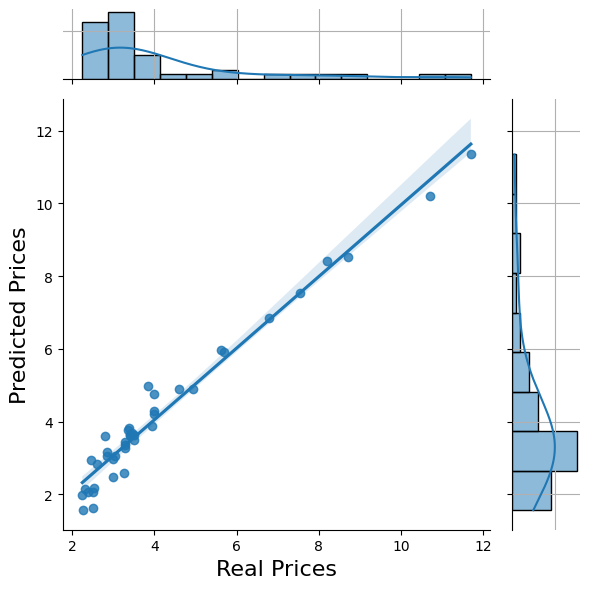

In [167]:
# Compare the predicted price values with real ones.

h=sns.jointplot(y=y_me,x=df['PriceTotal'],kind='reg')

h.set_axis_labels('Real Prices', 'Predicted Prices', fontsize=16)

h.ax_marg_y.grid('on')
h.ax_marg_x.grid('on')

# labels appear outside of plot area, so auto-adjust
h.figure.tight_layout() 

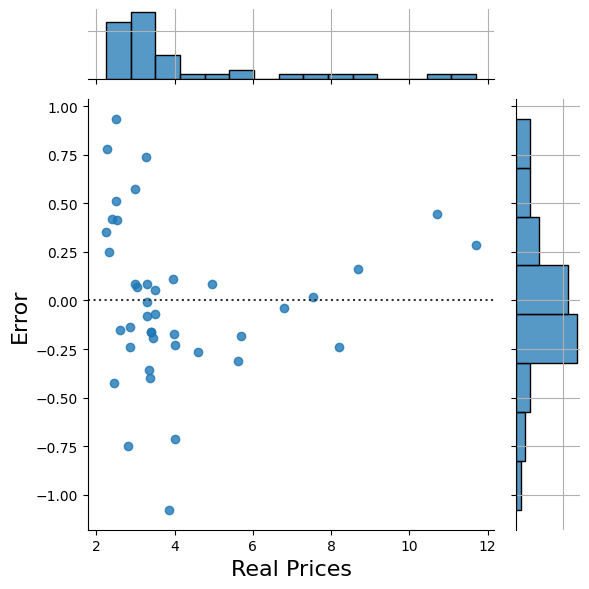

In [168]:
h2=sns.jointplot(y=error,x=df['PriceTotal'],kind='resid')
h2.set_axis_labels('Real Prices', 'Error', fontsize=16)

h2.ax_marg_y.grid('on')
h2.ax_marg_x.grid('on')

# labels appear outside of plot area, so auto-adjust
h2.figure.tight_layout() 

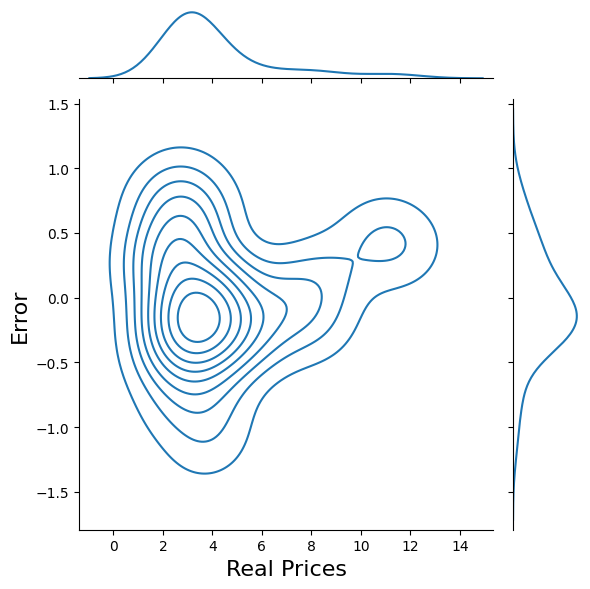

In [169]:
h3=sns.jointplot(y=error,x=df['PriceTotal'],kind='kde')
h3.set_axis_labels('Real Prices', 'Error', fontsize=16)
# labels appear outside of plot area, so auto-adjust
h3.figure.tight_layout() 